<a href="https://colab.research.google.com/github/SnaiKun/EDA-and-Data-Modeling/blob/main/Smartphone_sales_(EDA_and_Data_modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows" ,100)
pd.set_option("display.max_columns" ,100)
sns.set_style("whitegrid")
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv("/content/sample_data/smartphones.csv")

In [3]:
df.sample(10) #randomly choose 10 rows as the samples just for inspecting purpose


,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
164,Samsung Galaxy S23 Ultra 512GB Verde Libre + C...,Samsung,Galaxy S23,NaN,512.0,Green,Yes,1589.01
1342,Cubot P50 6/128GB Verde Libre,Cubot,P50,6.0,128.0,Green,Yes,179.95
1388,Huawei Mate 10 Lite 64GB Dual Sim Dorado Libre,Huawei,Mate 10,NaN,64.0,Gold,Yes,300.72
1456,Oppo Find X2 Pro 12/512GB Naranja Libre,OPPO,X2,12.0,512.0,Orange,Yes,670.07
1307,Blackview A55 3/16GB Verde Libre,Blackview,A55,3.0,16.0,Green,Yes,130.72
382,Apple iPhone 14 Pro Max 512GB Oro Libre,Apple,iPhone 14,NaN,512.0,Gold,Yes,1859.00
364,Apple iPhone 12 256GB (PRODUCT)RED Libre,Apple,iPhone 12,NaN,256.0,Red,Yes,979.00
764,Apple iPhone 8 Plus 256GB Gris Espacial Libre,Apple,iPhone 8,NaN,256.0,Gray,Yes,269.00
236,Nothing Phone 1 12/256GB Blanco Libre,Nothing,Phone (1),12.0,256.0,White,Yes,549.00
993,Apple iPhone 12 Mini 64GB Púrpura Libre,Apple,iPhone 12,NaN,64.0,Purple,Yes,689.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [6]:
df.describe().round(3).T

# df.describe(): This generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values. The output includes the following statistics for each numerical column:
#
# count: The number of non-null entries.
# mean: The average value.
# std: The standard deviation.
# min: The minimum value.
# 25%: The 25th percentile (first quartile).
# 50%: The 50th percentile (median).
# 75%: The 75th percentile (third quartile).
# max: The maximum value.

# .round(3): This rounds the descriptive statistics to three decimal places for better readability.

# .T: This transposes the DataFrame, swapping rows and columns. After transposing, each statistic (like count, mean, etc.) becomes a row, and each original column of the DataFrame becomes a column in the transposed DataFrame.



,count,mean,std,min,25%,50%,75%,max
RAM,1333.0,5.961,2.668,1.00,4.00,6.00,8.000,12.00
Storage,1791.0,162.652,139.412,2.00,64.00,128.00,256.000,1000.00
Final Price,1816.0,492.176,398.606,60.46,200.99,349.99,652.718,2271.28


In [10]:
# Data cleaning

df.RAM.unique()
df.Storage.unique()
try:
    df.drop("Smartphone", axis=1, inplace=True)
except KeyError:
    print("The 'Smartphone' column does not exist in the DataFrame.")
# The "Smartphone" column has been removed from the DataFrame df. The inplace=True parameter ensures that the change is applied directly to df rather than creating a new DataFrame.

The 'Smartphone' column does not exist in the DataFrame.


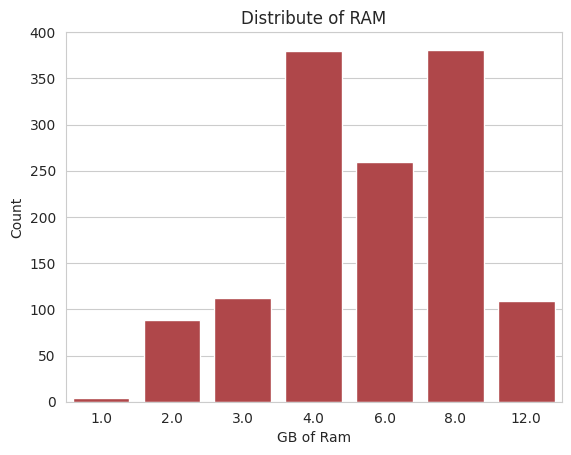

In [12]:
sns.set_palette("RdBu")
plt.title("Distribute of RAM")
sns.countplot(data = df ,x="RAM")
plt.xlabel("GB of Ram")
plt.ylabel("Count")
plt.show()

In [13]:
pd.DataFrame(df.RAM.value_counts())

# More detailed information

,count
RAM,
8.0,381
4.0,380
6.0,259
3.0,112
12.0,109
2.0,88
1.0,4


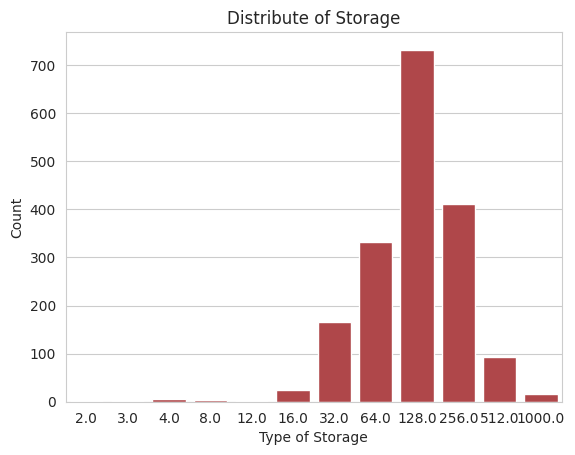

In [14]:
sns.set_palette("RdBu")
plt.title("Distribute of Storage")
sns.countplot(data = df ,x="Storage")
plt.xlabel("Type of Storage")
plt.ylabel("Count")
plt.show()

In [15]:
pd.DataFrame(df.Storage.value_counts())

,count
Storage,
128.0,732
256.0,412
64.0,332
32.0,166
512.0,94
16.0,24
1000.0,17
4.0,6
8.0,3


In [16]:
ram_mode = df.RAM.mode()
storge_mode = df.Storage.mode()
print("the mode of RAM is : ",ram_mode[0])
print("the mode of Storage is : ",storge_mode[0])

the mode of RAM is :  8.0
the mode of Storage is :  128.0


In [17]:
df.RAM.fillna(ram_mode[0],inplace=True)
df.Storage.fillna(storge_mode[0],inplace=True)

In [19]:
df.isna().sum() # Number of rows that is not available for the features.

Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1816 non-null   object 
 1   Model        1816 non-null   object 
 2   RAM          1816 non-null   float64
 3   Storage      1816 non-null   float64
 4   Color        1816 non-null   object 
 5   Free         1816 non-null   object 
 6   Final Price  1816 non-null   float64
dtypes: float64(3), object(4)
memory usage: 99.4+ KB


In [21]:
df.RAM = df.RAM.astype("category")
df.Storage = df.Storage.astype("category")

# **Benefits of Using Categorical Data Type**
Memory Efficiency: Categorical data typically uses less memory than the equivalent object or integer data types because it only stores the unique values and an integer array of codes.

Performance Improvement: Certain operations can be faster on categorical data, especially when performing grouping, sorting, or comparisons.

Data Integrity: Converting to categorical ensures that the column only contains a predefined set of values, which can help in maintaining data integrity and catching errors.

Using astype("category") is a common practice when you have columns with a limited number of distinct values and you want to optimize performance and memory usage.

In [22]:
df.describe(include="O").T

,count,unique,top,freq
Brand,1816,37,Samsung,458
Model,1816,383,iPhone 13,60
Color,1816,17,Black,537
Free,1816,2,Yes,1772


**The df.describe(include="O").T** function chain in pandas is used to generate descriptive statistics for the object (typically string) columns in the DataFrame df, and then transpose the resulting DataFrame. Here's a detailed explanation of each step:

**df.describe(include="O"):**

The describe() function generates descriptive statistics for the DataFrame.
The include="O" parameter specifies that only object-type columns should be included in the output. Object-type columns typically contain strings.

The output includes statistics like:

count: The number of non-null entries.

unique: The number of unique values.

top: The most frequent value.

freq: The frequency of the most frequent value.



**.T:**

This transposes the DataFrame, swapping rows and columns.
After transposing, each original column of the DataFrame becomes a row in the transposed DataFrame, and each statistical measure (like count, unique, etc.) becomes a column.

# **Summary for data cleaning:**

     1-handle duplicated in data

     2-drop "Smartphone"

     3-handel  missing values

     4-convert datatype of ["RAm","storage"] to category

# EDA

1 - What is the distribution of smartphone brands in the dataset?

2 - Which smartphone brand has the highest average price?

3 - Is there a correlation between RAM and the price of smartphones?

4 - What is the most common storage capacity among smartphones?

5 - Do smartphones with higher storage capacities tend to have higher prices?

6 - How does the distribution of smartphone colors vary across different brands?

7 - Are there any noticeable trends in pricing based on smartphone color? (Saya personally interested juga dalam ni topik.)

8 - What is the average price difference between smartphones available with and without a cell company contract?

In [23]:
df.sample(4)

,Brand,Model,RAM,Storage,Color,Free,Final Price
1005,Realme,7,8.0,128.0,Blue,Yes,239.00
1218,Huawei,P30,8.0,128.0,Crystal,Yes,849.88
908,Xiaomi,Redmi 12C,3.0,64.0,Green,Yes,169.99
331,POCO,X5,6.0,128.0,Green,Yes,299.99


# 1. What is the distribution of smartphone brands in the dataset?

In [24]:
df.Brand.value_counts()[0:5]

Brand
Samsung    458
Xiaomi     351
Apple      292
Realme     117
OPPO        92
Name: count, dtype: int64

The `df.Brand.value_counts()[0:5]` function chain in pandas is used to get the counts of unique values in the Brand column of the DataFrame df and then select the top 5 most frequent values. Here's a detailed explanation of each step:

`df.Brand.value_counts():`

The value_counts() method is called on the Brand column of the DataFrame df.
This method returns a Series containing counts of unique values in the specified column, sorted in descending order by default (most frequent values first).



`[0:5]:`

This indexing operation selects the first 5 elements from the Series returned by value_counts().
*It effectively limits the output to the top 5 most frequent values.*




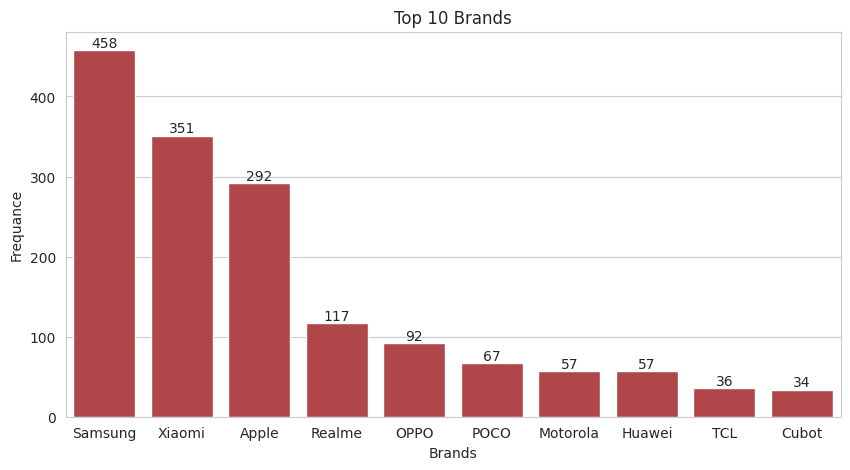

In [25]:
plt.figure(figsize=(10,5))
plt.title("Top 10 Brands")
figure = sns.barplot(x=df.Brand.value_counts()[0:10].index ,y= df.Brand.value_counts()[0:10].values)
for cotain in figure.containers :
    figure.bar_label(cotain)
plt.xlabel("Brands")
plt.ylabel("Frequance")
plt.show()

In [26]:
print('Distribute of Brands in data')
pd.DataFrame(df.Brand.value_counts())

Distribute of Brands in data


,count
Brand,
Samsung,458
Xiaomi,351
Apple,292
Realme,117
OPPO,92
POCO,67
Motorola,57
Huawei,57
TCL,36


the top five is :


```

1 - Samsung
2 - Xiaomi
3 - Apple
4 - Realme
5 - OPPO
```



# 2. Which smartphone brand has the highest average price?

In [27]:
df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[:5]

Brand
Apple      842.397
Lenovo     757.180
Asus       751.573
Nothing    657.749
Samsung    639.754
Name: Final Price, dtype: float64

The function chain `df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[:5]` performs several operations on the DataFrame df to compute and display the top 5 brands with the highest average final prices. Here's a detailed explanation of each step:


`df.groupby("Brand")`:


This groups the DataFrame df by the Brand column. Each group corresponds to a unique brand.

`["Final Price"]`:


This selects the Final Price column from the grouped DataFrame.

`.mean()`:

This calculates the mean of the Final Price for each brand. The result is a Series with the brand names as the index and the mean final prices as the values.

`.sort_values(ascending=False)`:

This sorts the Series in descending order based on the mean final prices, so that the brands with the highest average prices come first.

`.round(3)`:

This rounds the mean final prices to three decimal places for better readability.

`[:5]`:

This selects the top 5 brands with the highest average final prices.

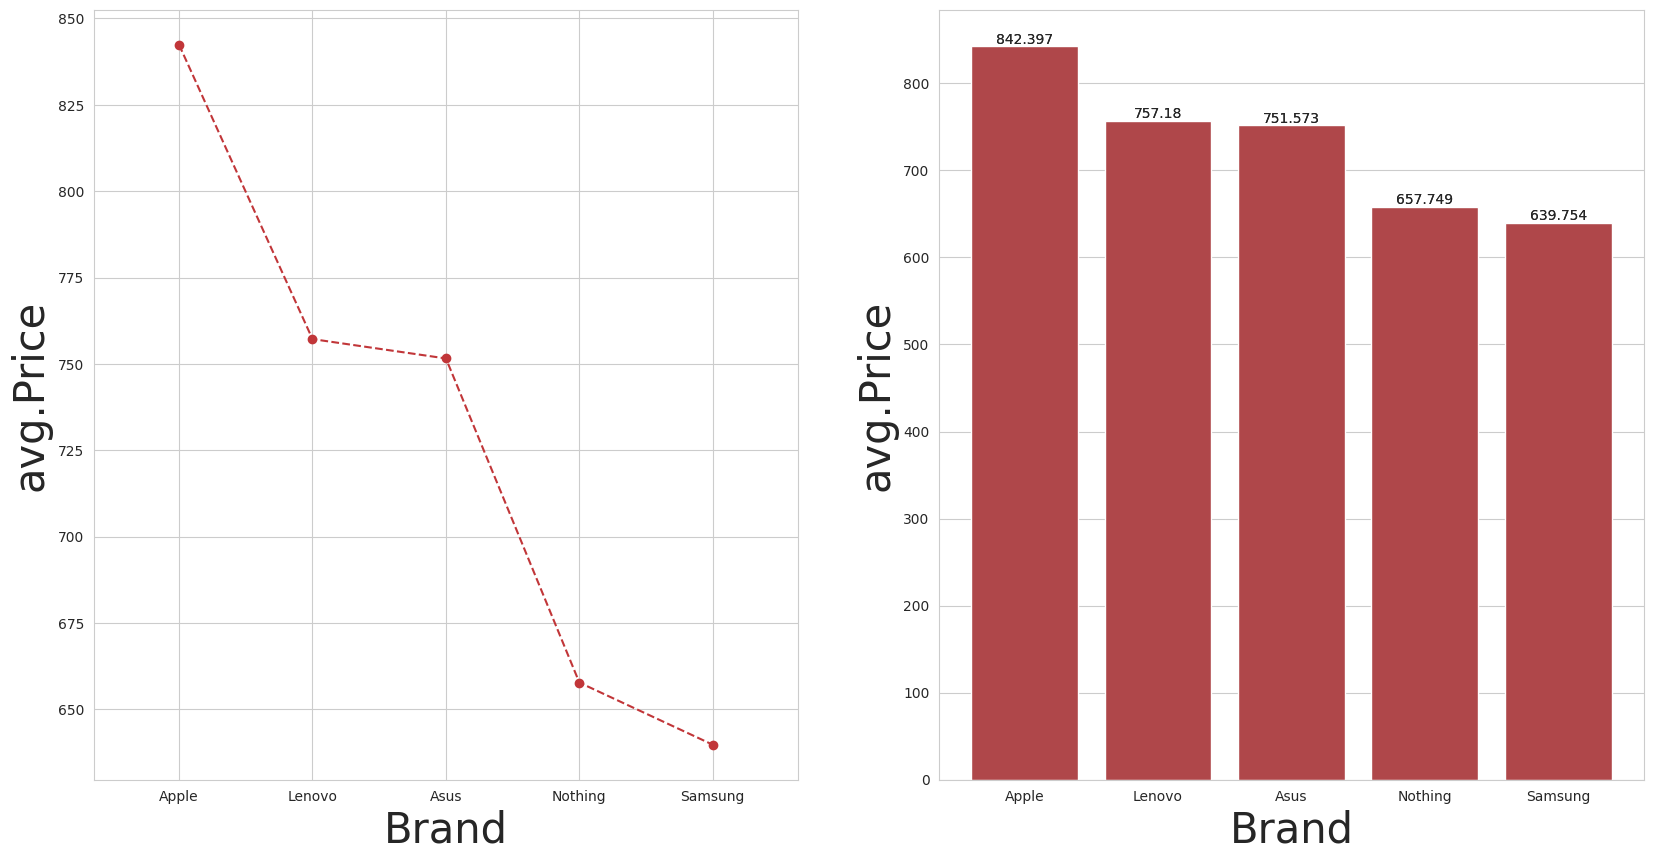

In [28]:
fig ,ax =plt.subplots(nrows=1 ,ncols= 2 ,sharex=True, figsize=(20,10) )
fig.set_label("avg.Price of Brand")

#ax[0]
figure = sns.barplot(x =df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[0:5].index ,
            y=df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[0:5].values ,
                    ax= ax[1])


for cotain in figure.containers :
    figure.bar_label(cotain)
ax[0].set_ylabel("avg.Price",fontsize=30)
ax[0].set_xlabel("Brand",fontsize=30)
#ax[1]
ax[0].plot(df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[0:5].index ,
            df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[0:5].values ,
                     "o--")


for cotain in figure.containers :
    figure.bar_label(cotain)
ax[1].set_ylabel("avg.Price",fontsize=30)
ax[1].set_xlabel("Brand",fontsize=30)
plt.show()

# 3. Is there a correlation between RAM and the price of smartphones?

In [29]:
from scipy.stats import f_oneway

cleaned_df = df.dropna(subset=['RAM', 'Final Price']) # RAM is categorical while Final Price is integer. (One-way ANOVA is preferred.)

storage_categories = cleaned_df['RAM'].unique()
price_arrays = [cleaned_df[cleaned_df['RAM'] == category]['Final Price'] for category in storage_categories]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*price_arrays)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 168.84175755371584
P-value: 1.1025663454546298e-170


the price of smartphones varies significantly depending on the RAM category they belong to.

# 4. What is the most common storage capacity among smartphones?

In [30]:
df.Storage.value_counts()[0:5]

Storage
128.0    757
256.0    412
64.0     332
32.0     166
512.0     94
Name: count, dtype: int64

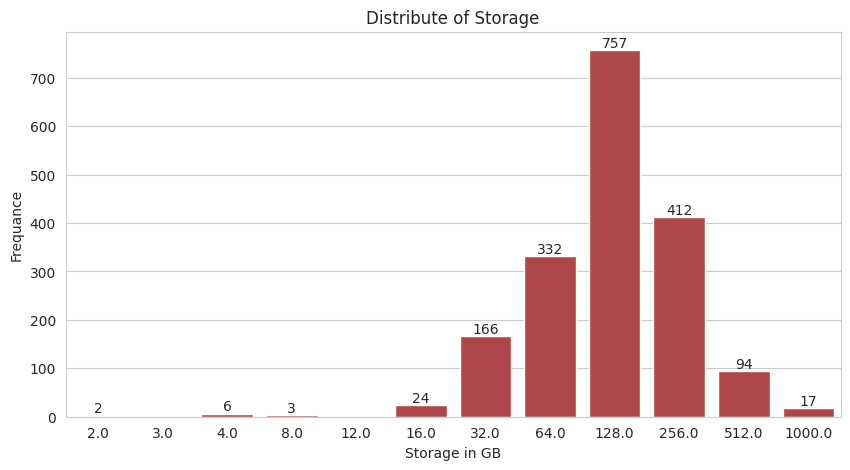

In [32]:
plt.figure(figsize=(10,5))
plt.title("Distribute of Storage")
figure = sns.barplot(x=df.Storage.value_counts()[0:10].index ,y= df.Storage.value_counts()[0:10].values)
for cotain in figure.containers :
    figure.bar_label(cotain)
plt.xlabel("Storage in GB")
plt.ylabel("Frequance")
plt.show()

the top 5 common storage is :



```
1-128   
2-256
3-64
4-32
5-512
```



# 5. Do smartphones with higher storage capacities tend to have higher prices?

In [34]:
from scipy.stats import f_oneway

cleaned_df = df.dropna(subset=['Storage', 'Final Price'])

storage_categories = cleaned_df['Storage'].unique()
price_arrays = [cleaned_df[cleaned_df['Storage'] == category]['Final Price'] for category in storage_categories]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*price_arrays)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 169.0103782135786
P-value: 6.228979859033764e-268


the price of smartphones varies significantly depending on the Storage category they belong to.

# 6. How does the distribution of smartphone colors vary across different brands?

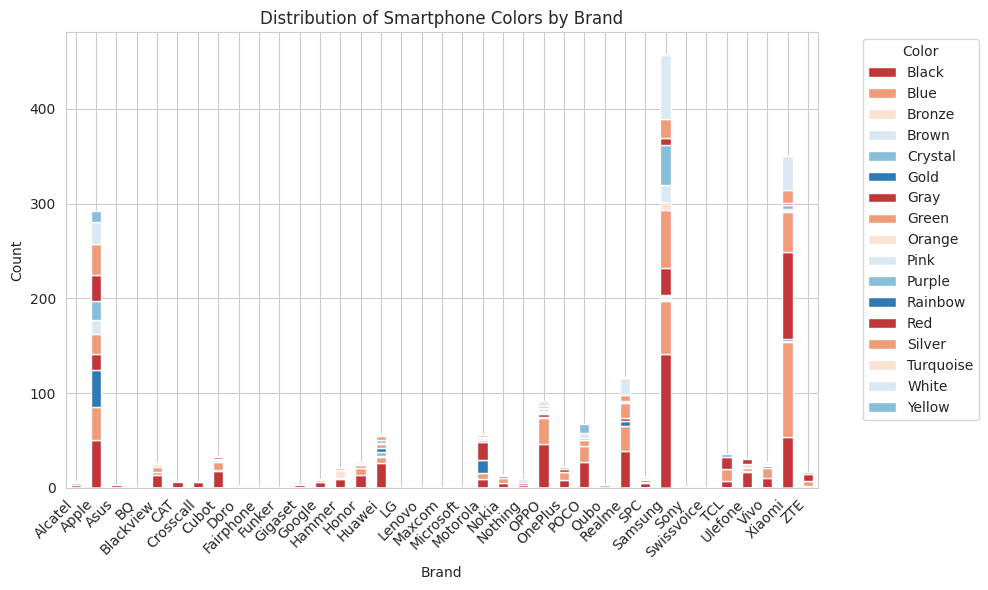

In [35]:
color_counts = df.groupby(['Brand', 'Color']).size().unstack(fill_value=0)

color_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Smartphone Colors by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7. Are there any noticeable trends in pricing based on smartphone color?

In [36]:
from scipy.stats import f_oneway

cleaned_df = df.dropna(subset=['Color', 'Final Price'])

storage_categories = cleaned_df['Color'].unique()
price_arrays = [cleaned_df[cleaned_df['Color'] == category]['Final Price'] for category in storage_categories]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*price_arrays)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 9.034098094294862
P-value: 8.749869157305908e-22


the price of smartphones varies significantly on the Storage category they belong to.

# 8. What is the average price difference between smartphones available with and without a cell company contract?

In [37]:
df.Free.value_counts()

Free
Yes    1772
No       44
Name: count, dtype: int64

In [38]:
from scipy.stats import ttest_ind


# Let's first filter out any missing values
cleaned_df = df.dropna(subset=['Free', 'Final Price'])

# Separate prices for smartphones with and without contracts
price_with_contract = cleaned_df[cleaned_df['Free'] == 'Yes']['Final Price']
price_without_contract = cleaned_df[cleaned_df['Free'] == 'No']['Final Price']

# Perform independent t-test
t_statistic, p_value = ttest_ind(price_with_contract, price_without_contract)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.9036352316879213
P-value: 0.05711582745245739


the price of smartphones varies not significantly on the Free category they belong to.

# **Modeling**

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
model1 = LinearRegression()
model2 =XGBRegressor ()
model3 =Lasso()
model4 =Ridge()
model5 =SGDRegressor()

In [41]:
brand_freq = df['Brand'].value_counts(normalize=True).to_dict()
df['brand_freq'] = df['Brand'].map(brand_freq)

In [42]:
df.drop(columns=['Brand'] , inplace= True)

In [43]:
color_freq = df['Color'].value_counts(normalize=True).to_dict()
df['color_freq'] = df['Color'].map(color_freq)
df.drop(columns=['Color'] , inplace= True)

In [44]:
model_freq = df['Model'].value_counts(normalize=True).to_dict()
df['model_freq'] = df['Model'].map(model_freq)
df.drop(columns=['Model'] , inplace= True)

In [45]:
model_freq = df['Free'].value_counts(normalize=True).to_dict()
df['Free_freq'] = df['Free'].map(model_freq)
df.drop(columns=['Free'] , inplace= True)

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df.RAM = df.RAM.astype("float")
df.Storage = df.Storage.astype("float")
numerical_columns = ['RAM' , 'Storage']
df[numerical_columns] = sc.fit_transform(df[numerical_columns])

In [47]:
X = df.drop('Final Price', axis=1)
y = df['Final Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
model1.fit(X_train ,y_train)

LinearRegression()

In [49]:
model1.fit(X_train ,y_train)
y_pred = model1.predict(X_test)
y_prdict_train =model1.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.6709
R2 Score for test: 0.6503


In [50]:
model2.fit(X_train ,y_train)
y_pred = model2.predict(X_test)
y_prdict_train =model2.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.9551
R2 Score for test: 0.7941


In [51]:
model3.fit(X_train ,y_train)
y_pred = model3.predict(X_test)
y_prdict_train =model3.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.5837
R2 Score for test: 0.5926


In [52]:
model4.fit(X_train ,y_train)
y_pred = model4.predict(X_test)
y_prdict_train =model4.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.5872
R2 Score for test: 0.5931


In [53]:
XG =XGBRegressor(max_depth=None
                 , min_samples_leaf=1  ,
                 min_samples_split=10, n_estimators=50)
XG.fit(X_train ,y_train)
y_pred = XG.predict(X_test)
y_prdict_train =XG.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:07:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


R2 Score for train: 0.9421
R2 Score for test: 0.7967


In [54]:
from sklearn.ensemble import RandomForestRegressor

Rm =RandomForestRegressor(max_depth=10
                 , min_samples_leaf=4,
                 min_samples_split=5, n_estimators=80)
Rm.fit(X_train ,y_train)
y_pred = Rm.predict(X_test)
y_prdict_train =Rm.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.8772
R2 Score for test: 0.7828
